In [ ]:
#%tensorflow_version 1.x
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Activation, Dense 
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
!pip install tensorflow-gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
im=cv2.imread("/content/drive/My Drive/flower/flower_data/valid/1/image_06739.jpg")

In [ ]:
!nvidia-smi

Mon Jul  5 05:12:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(im.shape)

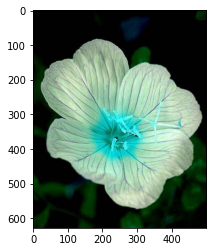

In [ ]:
plt.imshow(im)

In [ ]:

train_img_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 60,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
val_img_gen = ImageDataGenerator(
    rescale = 1/255.0,
)

In [ ]:
train_gen = train_img_gen.flow_from_directory(
    '/content/drive/My Drive/flower/flower_data/train',
    batch_size = 8,
    

)
val_gen = val_img_gen.flow_from_directory(
    '/content/drive/My Drive/flower/flower_data/valid',
)

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [ ]:

for (x, y) in train_gen:
  print(x.shape, y.shape)
  break

(8, 256, 256, 3) (8, 102)


In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import * 

In [ ]:
adam = Adam(lr=0.00003)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras.callbacks import Callback,  EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)

In [ ]:
# early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
cp_resnext = keras.callbacks.ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period = 1)



In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
from keras.applications.resnet import ResNet50
resnext = ResNet50(weights='imagenet', input_shape = (256, 256, 3), classes=102, include_top=False, backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)
resnext=ResNet50(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    )

resnext_hist = resnext.fit_generator(train_gen, steps_per_epoch=6552//8, validation_data=val_gen, validation_steps=818//8, epochs=20, callbacks=[es, cp_resnext])

NameError: ignored

In [ ]:
res_avg = GlobalAveragePooling2D()(resnext.output)
res_fc_1 = Dense(224, activation='relu')(res_avg)
res_fc_2 = Dense(128, activation='relu')(res_fc_1)
res_d = Dropout(0.25)(res_fc_2)
res_fc_3 = Dense(102, activation='softmax')(res_d)

In [ ]:
resnext.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
resnext.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:

 resnext_hist = resnext.fit_generator(input_shape=(224, 224, 3),train_gen, steps_per_epoch=6552//8, validation_data=val_gen, validation_steps=818//8, epochs=25)
resnext_hist=resnext.fit_generator(
    epochs=25,
    verbose="auto",
    validation_data=val_gen,
    steps_per_epoch=6552//8,
    validation_steps=818//8,
)

In [ ]:
resnext.save('/content/drive/My Drive/flowers/flowerdetection3.h5')
print("model saved")

In [ ]:
from keras.models import load_model
model_path = '/content/drive/My Drive/flower/flowerdetection3.h5'
model =load_model(model_path, compile=True)
print('model loaded')

In [ ]:
model.evaluate(val_gen,verbose=1)

In [ ]:
# cat_to_name={'1': 'pink primrose',
#  '10': 'globe thistle',
#  '100': 'blanket flower',
#  '101': 'trumpet creeper',
#  '102': 'blackberry lily',
#  '11': 'snapdragon',
#  '12': "colt's foot",
#  '13': 'king protea',
#  '14': 'spear thistle',
#  '15': 'yellow iris',
#  '16': 'globe-flower',
#  '17': 'purple coneflower',
#  '18': 'peruvian lily',
#  '19': 'balloon flower',
#  '2': 'hard-leaved pocket orchid',
#  '20': 'giant white arum lily',
#  '21': 'fire lily',
#  '22': 'pincushion flower',
#  '23': 'fritillary',
#  '24': 'red ginger',
#  '25': 'grape hyacinth',
#  '26': 'corn poppy',
#  '27': 'prince of wales feathers',
#  '28': 'stemless gentian',
#  '29': 'artichoke',
#  '3': 'canterbury bells',
#  '30': 'sweet william',
#  '31': 'carnation',
#  '32': 'garden phlox',
#  '33': 'love in the mist',
#  '34': 'mexican aster',
#  '35': 'alpine sea holly',
#  '36': 'ruby-lipped cattleya',
#  '37': 'cape flower',
#  '38': 'great masterwort',
#  '39': 'siam tulip',
#  '4': 'sweet pea',
#  '40': 'lenten rose',
#  '41': 'barbeton daisy',
#  '42': 'daffodil',
#  '43': 'sword lily',
#  '44': 'poinsettia',
#  '45': 'bolero deep blue',
#  '46': 'wallflower',
#  '47': 'marigold',
#  '48': 'buttercup',
#  '49': 'oxeye daisy',
#  '5': 'english marigold',
#  '50': 'common dandelion',
#  '51': 'petunia',
#  '52': 'wild pansy',
#  '53': 'primula',
#  '54': 'sunflower',
#  '55': 'pelargonium',
#  '56': 'bishop of llandaff',
#  '57': 'gaura',
#  '58': 'geranium',
#  '59': 'orange dahlia',
#  '6': 'tiger lily',
#  '60': 'pink-yellow dahlia',
#  '61': 'cautleya spicata',
#  '62': 'japanese anemone',
#  '63': 'black-eyed susan',
#  '64': 'silverbush',
#  '65': 'californian poppy',
#  '66': 'osteospermum',
#  '67': 'spring crocus',
#  '68': 'bearded iris',
#  '69': 'windflower',
#  '7': 'moon orchid',
#  '70': 'tree poppy',
#  '71': 'gazania',
#  '72': 'azalea',
#  '73': 'water lily',
#  '74': 'rose',
#  '75': 'thorn apple',
#  '76': 'morning glory',
#  '77': 'passion flower',
#  '78': 'lotus lotus',
#  '79': 'toad lily',
#  '8': 'bird of paradise',
#  '80': 'anthurium',
#  '81': 'frangipani',
#  '82': 'clematis',
#  '83': 'hibiscus',
#  '84': 'columbine',
#  '85': 'desert-rose',
#  '86': 'tree mallow',
#  '87': 'magnolia',
#  '88': 'cyclamen',
#  '89': 'watercress',
#  '9': 'monkshood',
#  '90': 'canna lily',
#  '91': 'hippeastrum',
#  '92': 'bee balm',
#  '93': 'ball moss',
#  '94': 'foxglove',
#  '95': 'bougainvillea',
#  '96': 'camellia',
#  '97': 'mallow',
#  '98': 'mexican petunia',
#  '99': 'bromelia'}

In [ ]:
# a=model.predict(test_gen[800][0])
# pred = np.argmax(a)
# print(pred)
# cat_to_name['102']

In [ ]:
model.evaluate(test_gen, steps=102,verbose=1)


In [ ]:

# import cv2
# img=cv2.imread('/content/drive/My Drive/flower/flower_data/valid/1/image_06765.jpg')
# img_det = cv2.resize(img,(256,256))
# img_det= img_det.astype("float") / 255.0
# img_det= np.expand_dims(img_det, axis=0)
# a=model.predict(img_det)[0]*100
# print(a)
# top_classes = sorted(range(len(a)), key=lambda i: a[i])[-5:]
# top_p= [a[i] for i in np.argsort(a)[-5:]]
# print(top_classes)
# print(top_p)
# pred = np.argmax(a)
# print(pred)


In [ ]:
# cat_to_name={'1': 'pink primrose',
#  '10': 'globe thistle',
#  '100': 'blanket flower',
#  '101': 'trumpet creeper',
#  '102': 'blackberry lily',
#  '11': 'snapdragon',
#  '12': "colt's foot",
#  '13': 'king protea',
#  '14': 'spear thistle',
#  '15': 'yellow iris',
#  '16': 'globe-flower',
#  '17': 'purple coneflower',
#  '18': 'peruvian lily',
#  '19': 'balloon flower',
#  '2': 'hard-leaved pocket orchid',
#  '20': 'giant white arum lily',
#  '21': 'fire lily',
#  '22': 'pincushion flower',
#  '23': 'fritillary',
#  '24': 'red ginger',
#  '25': 'grape hyacinth',
#  '26': 'corn poppy',
#  '27': 'prince of wales feathers',
#  '28': 'stemless gentian',
#  '29': 'artichoke',
#  '3': 'canterbury bells',
#  '30': 'sweet william',
#  '31': 'carnation',
#  '32': 'garden phlox',
#  '33': 'love in the mist',
#  '34': 'mexican aster',
#  '35': 'alpine sea holly',
#  '36': 'ruby-lipped cattleya',
#  '37': 'cape flower',
#  '38': 'great masterwort',
#  '39': 'siam tulip',
#  '4': 'sweet pea',
#  '40': 'lenten rose',
#  '41': 'barbeton daisy',
#  '42': 'daffodil',
#  '43': 'sword lily',
#  '44': 'poinsettia',
#  '45': 'bolero deep blue',
#  '46': 'wallflower',
#  '47': 'marigold',
#  '48': 'buttercup',
#  '49': 'oxeye daisy',
#  '5': 'english marigold',
#  '50': 'common dandelion',
#  '51': 'petunia',
#  '52': 'wild pansy',
#  '53': 'primula',
#  '54': 'sunflower',
#  '55': 'pelargonium',
#  '56': 'bishop of llandaff',
#  '57': 'gaura',
#  '58': 'geranium',
#  '59': 'orange dahlia',
#  '6': 'tiger lily',
#  '60': 'pink-yellow dahlia',
#  '61': 'cautleya spicata',
#  '62': 'japanese anemone',
#  '63': 'black-eyed susan',
#  '64': 'silverbush',
#  '65': 'californian poppy',
#  '66': 'osteospermum',
#  '67': 'spring crocus',
#  '68': 'bearded iris',
#  '69': 'windflower',
#  '7': 'moon orchid',
#  '70': 'tree poppy',
#  '71': 'gazania',
#  '72': 'azalea',
#  '73': 'water lily',
#  '74': 'rose',
#  '75': 'thorn apple',
#  '76': 'morning glory',
#  '77': 'passion flower',
#  '78': 'lotus lotus',
#  '79': 'toad lily',
#  '8': 'bird of paradise',
#  '80': 'anthurium',
#  '81': 'frangipani',
#  '82': 'clematis',
#  '83': 'hibiscus',
#  '84': 'columbine',
#  '85': 'desert-rose',
#  '86': 'tree mallow',
#  '87': 'magnolia',
#  '88': 'cyclamen',
#  '89': 'watercress',
#  '9': 'monkshood',
#  '90': 'canna lily',
#  '91': 'hippeastrum',
#  '92': 'bee balm',
#  '93': 'ball moss',
#  '94': 'foxglove',
#  '95': 'bougainvillea',
#  '96': 'camellia',
#  '97': 'mallow',
#  '98': 'mexican petunia',
#  '99': 'bromelia'}

In [ ]:
# img=cv2.imread('/content/drive/My Drive/flower/flower_data/valid/1/image_06765.jpg')
# true_label = cat_to_name["1"]
# img_det = cv2.resize(img,(256,256))
# img_det= img_det.astype("float") / 255.0
# img_det= np.expand_dims(img_det, axis=0)
# a=model.predict(img_det)[0]*100
# top_classes = sorted(range(len(a)), key=lambda i: a[i])[-5:]
# top_p= [a[i] for i in np.argsort(a)[-5:]]
# labels = []
# for classes in top_classes:
#     labels.append(list(cat_to_name.values())[classes])

# # Plotting
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# # Test Image
# ax1.set_title(true_label)
# ax1.imshow(img)
# ax1.axis('off')

# # Top 5 predictions
# ax2.set_title('Predictions')
# ax2.set_yticks(np.arange(5))
# ax2.set_yticklabels(labels)
# ax2.set_xlabel('Probability')
# ax2.invert_yaxis()
# ax2.barh(np.arange(5), top_p, xerr=0, align='center')

# plt.show()

# New Section

In [ ]:
!python --version